## Canada - Admissions of Permanent Residents by Country of Citizenship, January 2015 - December 2020

### Introduction

Over the past few years, Immigration, Refugees and Citizenship Canada (IRCC) has repeatedly announced its ambitious immigration plans, which has attracted great attention from public media and prospective candidates. The pandemic, starting from last year, undoubtedly imposed a significant challenge to the immigration system and left many questions regarding the application admission process unanswered.

By analyzing the admission data, we try to answer the following questions:


### Load and Clean Data

In [1]:
import pandas as pd
import os
import xlrd


In [2]:
# Loading raw data download from IRCC website
file = os.path.join(os.getcwd(),'IRCC_M_PRadmiss_0002_E.xls')
# Read data and remove header & footer
data = pd.read_excel(file,skiprows=4,skipfooter=4)

In [3]:
# Examine data
data.head()

,Unnamed: 0,Jan,Feb,Mar,Q1 Total,Apr,May,Jun,Q2 Total,Jul,...,Q2 Total.5,Jul.5,Aug.5,Sep.5,Q3 Total.5,Oct.5,Nov.5,Dec.5,Q4 Total.5,Unnamed: 102
0,Afghanistan,90,125,220,435,135,220,195,555,250,...,95,85,95,180,360,120,185,160,465,1655
1,Albania,15,25,50,90,45,45,75,165,45,...,45,30,20,20,70,20,30,10,60,285
2,Algeria,80,125,235,440,255,340,280,875,310,...,260,335,440,310,1085,270,175,200,645,2715
3,Andorra,0,0,0,0,--,0,0,--,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,--,0,--,--,10,--,--,15,--,...,--,--,--,--,10,5,--,--,10,35


There are obvious issues with the raw data: i) the column names need to be corrected and add year information. ii) the missing valeus may need to be inputed based on use case.

In [4]:
def clean_col(col):
    """
    This function cleans the column names and add the year information
    """
    if col == 'Unnamed: 0': #Special case for contry column
        return 'Country'
    elif col[0] =='U':  # Take care for the annual summary column
        return 'Total, {}'.format(str(int(col.split(':')[1])//17 +2014))
    elif (len(col.split('.')) == 1) & (col[0] !='U'): 
        return col + ', 2015'
    elif col.split('.')[1] == '1':
        return col.split('.')[0]+', 2016'
    elif col.split('.')[1] == '2':
        return col.split('.')[0]+', 2017'
    elif col.split('.')[1] == '3':
        return col.split('.')[0]+', 2018'
    elif col.split('.')[1] == '4':
        return col.split('.')[0]+', 2019'
    elif col.split('.')[1] == '5':
        return col.split('.')[0]+', 2020'

col_names = [clean_col(i) for i in data.columns]
data.columns = col_names
data.set_index('Country',inplace=True)
data.head()

,"Jan, 2015","Feb, 2015","Mar, 2015","Q1 Total, 2015","Apr, 2015","May, 2015","Jun, 2015","Q2 Total, 2015","Jul, 2015","Aug, 2015",...,"Q2 Total, 2020","Jul, 2020","Aug, 2020","Sep, 2020","Q3 Total, 2020","Oct, 2020","Nov, 2020","Dec, 2020","Q4 Total, 2020","Total, 2020"
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,435,135,220,195,555,250,145,...,95,85,95,180,360,120,185,160,465,1655
Albania,15,25,50,90,45,45,75,165,45,65,...,45,30,20,20,70,20,30,10,60,285
Algeria,80,125,235,440,255,340,280,875,310,280,...,260,335,440,310,1085,270,175,200,645,2715
Andorra,0,0,0,0,--,0,0,--,0,--,...,0,0,0,0,0,0,0,0,0,0
Angola,--,0,--,--,10,--,--,15,--,--,...,--,--,--,--,10,5,--,--,10,35


Filling NULL values: Because this data is obtained from IRCC, it's unlikely the missing values are due to undocumentaed immigration cases. Possible reasons for missing valeus might be dual-citizenship, or no values were entered simply because there were no immigration cases during that time frame. Therefore, we fill all missing values as 0.



In [5]:
data = data.applymap(lambda x: 0 if x == '--' else int(x))
data.head()

,"Jan, 2015","Feb, 2015","Mar, 2015","Q1 Total, 2015","Apr, 2015","May, 2015","Jun, 2015","Q2 Total, 2015","Jul, 2015","Aug, 2015",...,"Q2 Total, 2020","Jul, 2020","Aug, 2020","Sep, 2020","Q3 Total, 2020","Oct, 2020","Nov, 2020","Dec, 2020","Q4 Total, 2020","Total, 2020"
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,90,125,220,435,135,220,195,555,250,145,...,95,85,95,180,360,120,185,160,465,1655
Albania,15,25,50,90,45,45,75,165,45,65,...,45,30,20,20,70,20,30,10,60,285
Algeria,80,125,235,440,255,340,280,875,310,280,...,260,335,440,310,1085,270,175,200,645,2715
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,10,0,0,15,0,0,...,0,0,0,0,10,5,0,0,10,35


### Analyze Data

Question 1: What are the five largest origins of new Canada immigrants?

<AxesSubplot:xlabel='Country'>

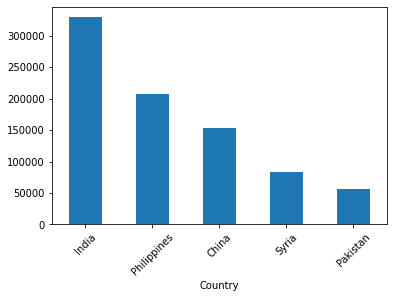

In [6]:
largest_3 = data[['Total, 2015','Total, 2016','Total, 2017','Total, 2018','Total, 2019','Total, 2020']]
largest_3.drop(['Country not stated','Total'],axis=0,inplace=True)
largest_3['Total, 5years'] = largest_3.sum(axis=1)
largest_3.rename(index={'China, People\'s Republic of':'China'},inplace=True)
largest_3['Total, 5years'].sort_values(ascending=False).head().plot(kind='bar', rot=45)
